# Aula 01 - Gráficos: introdução e plotagem com pandas

O que é um gráfico? Para que serve?

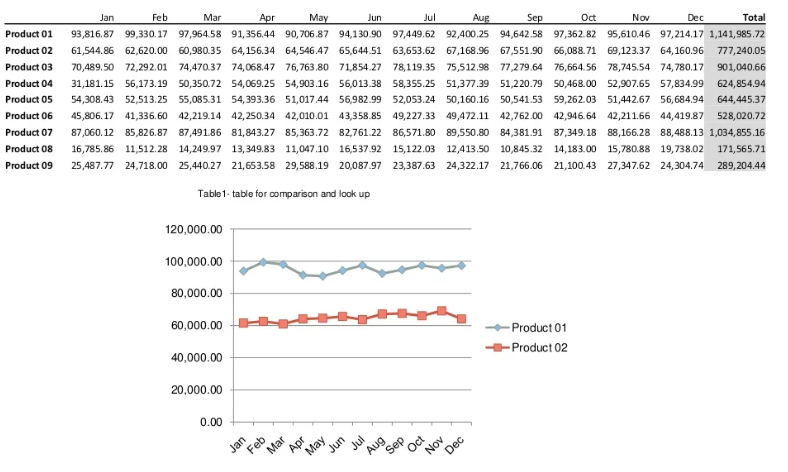

Comparando a tabela e o gráfico acima, podemos citar como:

- Vantagens: facilita a visualização de padrões ou tendências; permite destacar mais facilmente aquilo que se deseja mostrar.

- Desvantagens: perdemos informação acerca da "exatidão" do que está sendo mostrado.

Gráficos, assim como tabelas, representam **relações entre diferentes grandezas/variáveis**. Em particular, os gráficos permitem destacar informações com uma rápida "batida de olho". Em contraste, tabelas podem detalhar informações um pouco melhor, no sentido de apresentar valores mais precisos que nem sempre podem ser postos em uma visualização gráfica limpa e eficiente.

Em geral, **um bom gráfico destaca informações e padrões de maneira clara**.

## Principais tipos de gráficos

#### Gráfico de linhas

Usualmente utilizados quando queremos analisar a **evolução temporal** de determinadas quantidades.

Como exemplo, vamos avaliar um conjunto de dados com casos de COVID-19.

In [3]:
import pandas as pd
df = pd.read_csv("Datasets/Covid_19_Countrywise_timeseries.csv")

In [4]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


#### Qual o intervalo de datas destes dados?

In [7]:
df['ObservationDate'].min()

'01/22/2020'

In [8]:
df['ObservationDate'].max()

'03/28/2020'

#### O que poderíamos visualizar, de interessante, nestes dados?

In [9]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4973 entries, 0 to 4972
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4973 non-null   int64  
 1   ObservationDate  4973 non-null   object 
 2   country          4973 non-null   object 
 3   Confirmed        4973 non-null   int64  
 4   Deaths           4973 non-null   int64  
 5   Recovered        4973 non-null   int64  
 6   Code             4713 non-null   object 
 7   latitude         4728 non-null   float64
 8   longitude        4728 non-null   float64
 9   New Confirmed    4973 non-null   int64  
 10  New Recovered    4973 non-null   int64  
 11  New Death        4973 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 466.3+ KB


<AxesSubplot: xlabel='ObservationDate'>

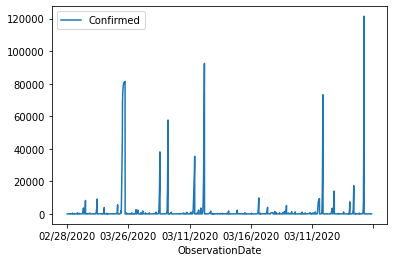

In [12]:
# Vamos plotar, por exemplo, quantidade de casos por dia (acumulado)
df.plot(x = 'ObservationDate', y = 'Confirmed')

In [13]:
df['date'] = pd.to_datetime(df['ObservationDate'])

In [16]:
df[['ObservationDate', 'date']]

,ObservationDate,date
0,02/28/2020,2020-02-28
1,03/10/2020,2020-03-10
2,02/24/2020,2020-02-24
3,02/25/2020,2020-02-25
4,02/26/2020,2020-02-26
...,...,...
4968,03/24/2020,2020-03-24
4969,03/25/2020,2020-03-25
4970,03/26/2020,2020-03-26
4971,03/27/2020,2020-03-27


<AxesSubplot: xlabel='date'>

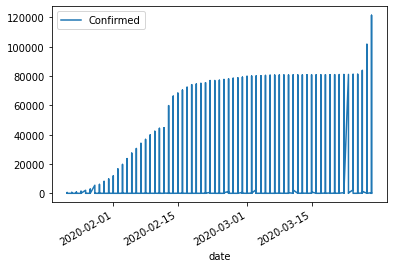

In [20]:
# Refazendo o gráfico acima com o objeto em "datetime"
df.plot(x = 'date', y = 'Confirmed')

<AxesSubplot: title={'center': 'Novos casos por dia - COVID 19'}, xlabel='Data', ylabel='Total de novos casos por dia'>

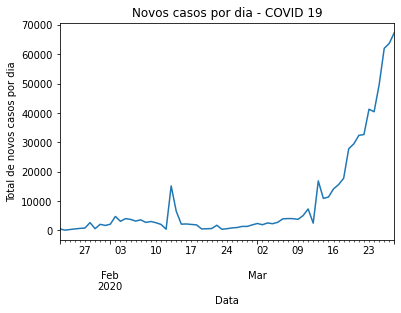

In [28]:
# Avaliando a quantidade de novos casos por dia
df.groupby("date")['New Confirmed'].sum().plot(title = 'Novos casos por dia - COVID 19',
                                              legend = False,
                                              xlabel = 'Data',
                                              ylabel = 'Total de novos casos por dia')

<AxesSubplot: xlabel='date'>

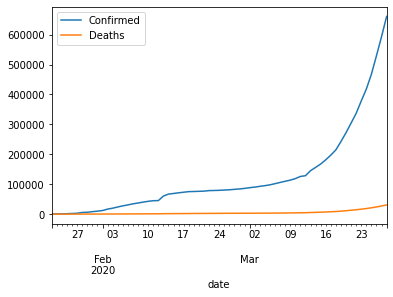

In [29]:
# Avaliando a quantidade de novos casos por dia
df.groupby("date")[['Confirmed', 'Deaths']].sum().plot()

#### Gráfico de barras

No gráfico de barras, geralmente visualizamos relações quantitativas de **variáveis categóricas**. É comum que a visualização em gráfico de barras esteja relacionada a **quantidades discretas**.

**O que poderíamos investigar no mesmo dataset que estamos avaliando?**

In [30]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,date
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2020-02-28
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,2020-03-10
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0,2020-02-24
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-25
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-26


<AxesSubplot: xlabel='country'>

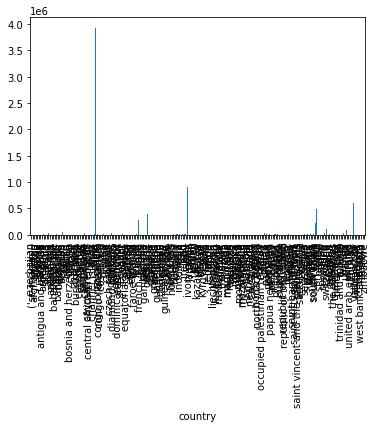

In [32]:
# Acumulado de casos por país (somamos entre as datas)
df.groupby("country")['Confirmed'].sum().plot(kind = 'bar')

In [34]:
df['country'].unique().size

212

A visualização acima é bastante bagunçada, e há vários países com pouquíssimos casos (comparados a outros). Como poderíamos manter apenas os países com casos mais críticos?

In [39]:
# Top 10 países com mais casos confirmados (acumulado)
df.groupby("country")['Confirmed'].sum().sort_values(ascending = False)[0:10]

country
china          3931798
italy           905869
us              596587
spain           478543
iran            403155
germany         387969
france          271460
south korea     227988
switzerland     107781
uk               98012
Name: Confirmed, dtype: int64

<AxesSubplot: title={'center': 'Top 10 países com mais casos confirmados (acumulados)'}, xlabel='country'>

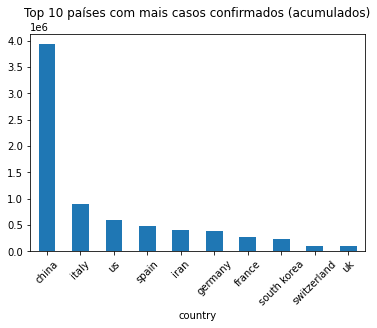

In [43]:
df.groupby("country")['Confirmed'].sum().sort_values(ascending = False)[0:10].plot(kind = 'bar',
                                                                                  title = 'Top 10 países com mais casos confirmados (acumulados)',
                                                                                  rot = 45)

<AxesSubplot: title={'center': 'Top 10 países com mais casos confirmados (acumulados)'}, ylabel='country'>

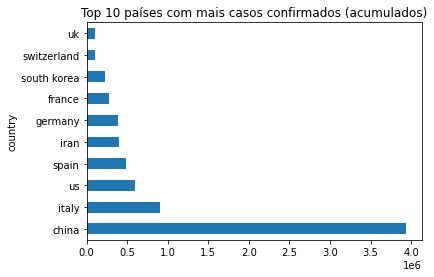

In [46]:
df.groupby("country")['Confirmed'].sum().sort_values(ascending = False)[0:10].plot(kind = 'barh',
                                                                                  title = 'Top 10 países com mais casos confirmados (acumulados)',
                                                                                  )

<AxesSubplot: title={'center': 'Top 10 países com mais casos confirmados (acumulados)'}, ylabel='country'>

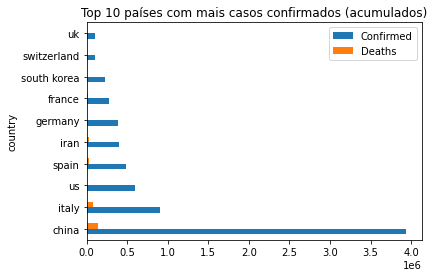

In [49]:
df.groupby("country")[['Confirmed', 'Deaths']].sum().sort_values(by = 'Confirmed', ascending = False)[0:10].plot(kind = 'barh',
                                                                                  title = 'Top 10 países com mais casos confirmados (acumulados)',
                                                                                  )

#### Gráfico de pizza

Dentre os 10 países com mais casos de COVID-19 registrados no dataset, visualizemos a porcentagem de casos em cada um destes países.

<AxesSubplot: title={'center': 'Top 10 países com mais casos confirmados (acumulados)'}, ylabel='Confirmed'>

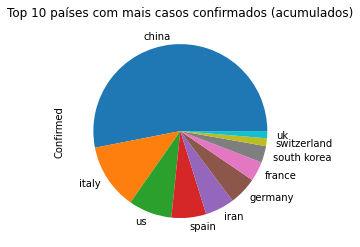

In [50]:
df.groupby("country")['Confirmed'].sum().sort_values(ascending = False)[0:10].plot(kind = 'pie',
                                                                                  title = 'Top 10 países com mais casos confirmados (acumulados)'
                                                                                  )

#### Gráfico de dispersão (scatter plot)

C:\Users\cstefano\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1010: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Confirmed', ylabel='Deaths'>

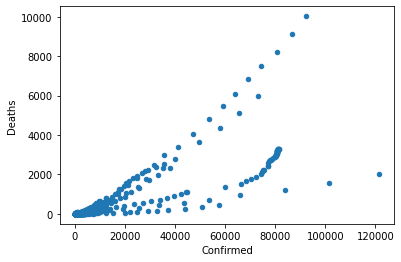

In [51]:
# Verificar existências de relações entre variáveis
df.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths')

<AxesSubplot: xlabel='Confirmed', ylabel='Deaths'>

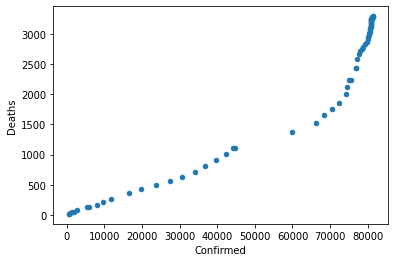

In [53]:
df_china = df[df['country'].isin(['china'])]
df_china.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths')

<AxesSubplot: xlabel='Confirmed', ylabel='Deaths'>

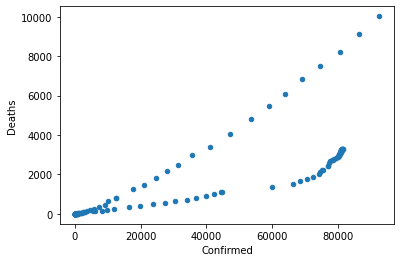

In [58]:
df2 = df[df['country'].isin(['china', 'italy'])]
df2.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths')

In [59]:
df_italy = df[df['country'] == 'italy']

<AxesSubplot: xlabel='Confirmed', ylabel='Deaths'>

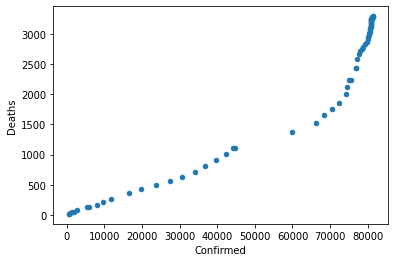

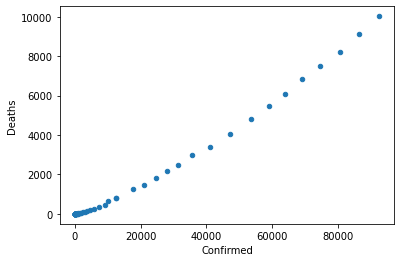

In [61]:
df_china.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths')
df_italy.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths')

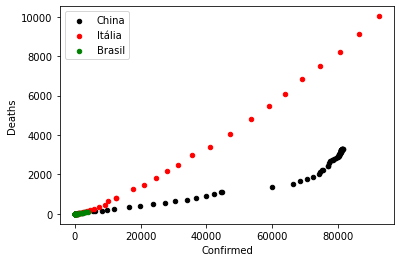

In [69]:
# Guardamos o retorno do primeiro plot
ax = df_china.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', color = 'k')

# Usar o retorno para especificar os eixos do segundo plot
df_italy.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', ax = ax, color = 'r')

df_brazil = df[df['country'] == 'brazil']
df_brazil.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', ax = ax, color = 'g')

import matplotlib.pyplot as plt
plt.legend(['China', 'Itália', 'Brasil'])

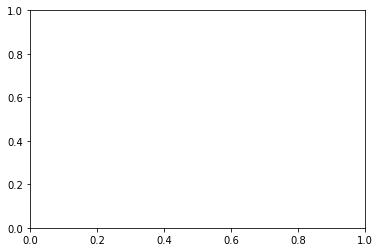

In [71]:
fig, ax = plt.subplots(1,1)

In [73]:
type(fig)

matplotlib.figure.Figure

In [74]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

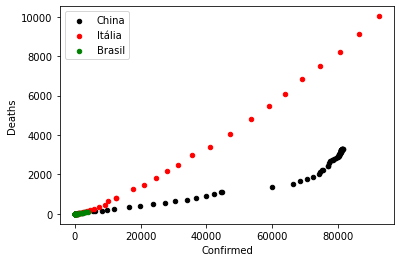

In [76]:
# Guardamos o retorno do primeiro plot
fig, ax = plt.subplots(1,1)
df_china.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths',ax = ax, color = 'k')

# Usar o retorno para especificar os eixos do segundo plot
df_italy.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', ax = ax, color = 'r')

df_brazil = df[df['country'] == 'brazil']
df_brazil.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', ax = ax, color = 'g')

import matplotlib.pyplot as plt
plt.legend(['China', 'Itália', 'Brasil'])

(0.0, 10000.0)

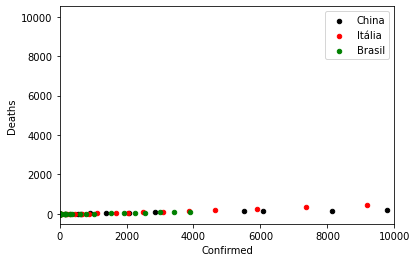

In [78]:
# Guardamos o retorno do primeiro plot
ax = df_china.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', color = 'k')

# Usar o retorno para especificar os eixos do segundo plot
df_italy.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', ax = ax, color = 'r')

df_brazil = df[df['country'] == 'brazil']
df_brazil.plot(kind = 'scatter', x = 'Confirmed', y = 'Deaths', ax = ax, color = 'g')

import matplotlib.pyplot as plt
plt.legend(['China', 'Itália', 'Brasil'])

plt.xlim([0, 10000])

#### Histogramas

Quando extraímos dados de medições que realizamos, é muito comum que nem todas as medições, feitas sob as mesmas condições, retornem, necessariamente, exatamente os mesmos valores (por quê?). Sendo assim, torna-se útil visualizar a **distribuição** dos valores que estamos mensurando, para entender as faixas de valores em que estamos trabalhando, e a **dispersão** desses valores.

No histograma, representamos, no eixo-x, **intervalos pré-determinados de valores**, e, no eixo-y (frequência), a **contagem** da ocorrência daquele intervalo, dentro de todo o conjunto de dados. Geralmente usamos, para isso, um gráfico de barras.

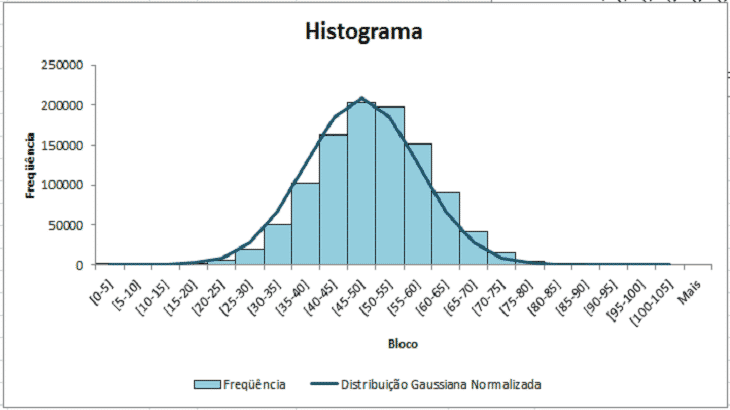

Apesar de o formato de histograma ilustrado na figura acima ("sino invertido") ser bastante comum, nem sempre as características que estamos explorando terão esse tipo de distribuição. Em nosso dataset de COVID, por exemplo, a distribuição do número de novos casos confirmados é bem distinta desta.

In [79]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,date
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2020-02-28
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,2020-03-10
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0,2020-02-24
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-25
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-26


<AxesSubplot: ylabel='Frequency'>

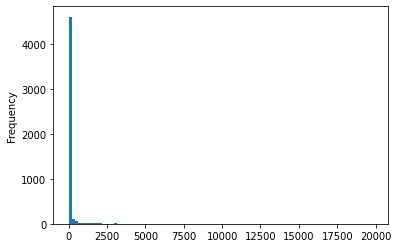

In [81]:
df['New Confirmed'].plot(kind = 'hist', bins = 100)

Como podemos interpretar a distribuição acima?

#### Boxplot

Um boxplot possui uma ideia bastante similar a um histograma. Seu objetivo é indicar **pontos estatísticos de interesse da distribuição da quantidade sendo avaliada**. Usualmente, um boxplot contém 5 pontos de interesse: a mediana da distribuição, os pontos do primeiro (Q1) e terceiro (Q3) quartis, e os pontos de corte a partir dos quais consideraremos as observações como **outliers**.

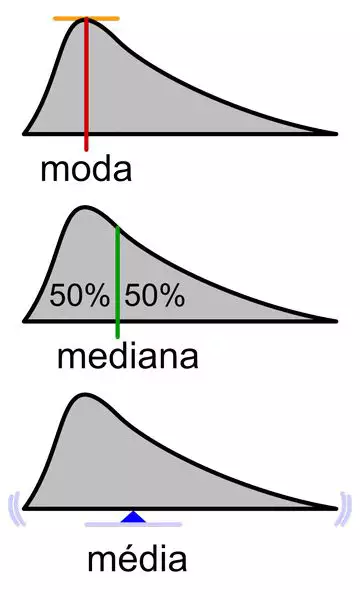

A **mediana** divide os valores da distribuição (ordenados) exatamente ao meio.

Um **outlier** é um ponto que **destoa** muito da distribuição, quando comparado aos demais!

-> O que seria "destoar muito"? Como quantificamos isso?

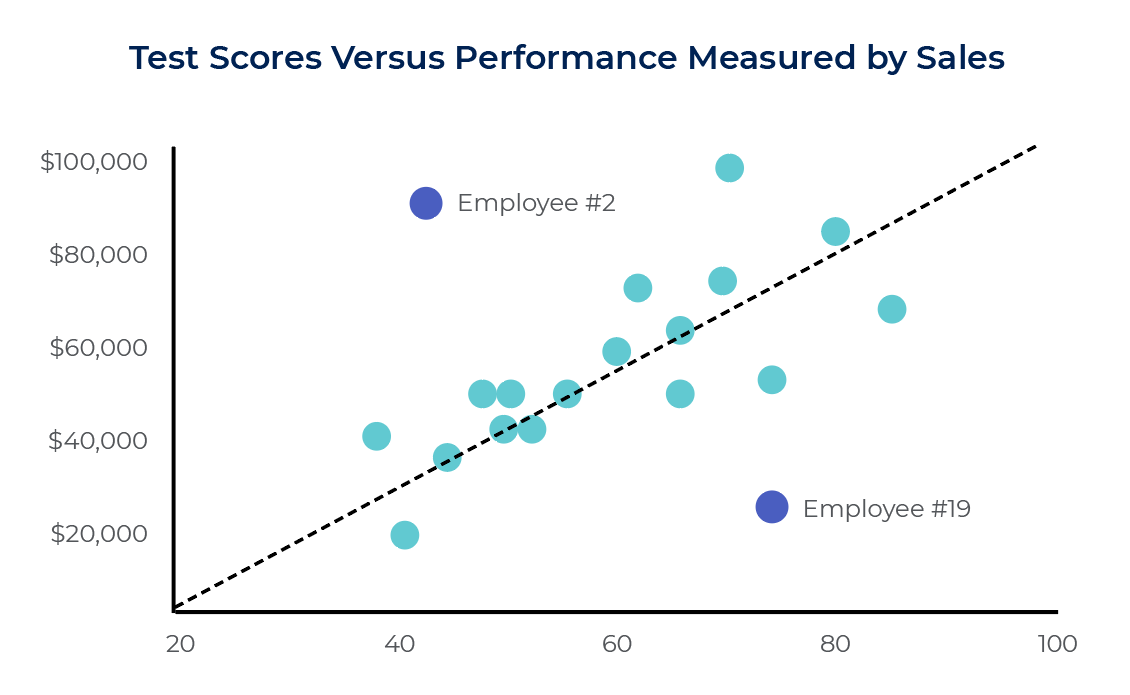

Elementos do boxplot:

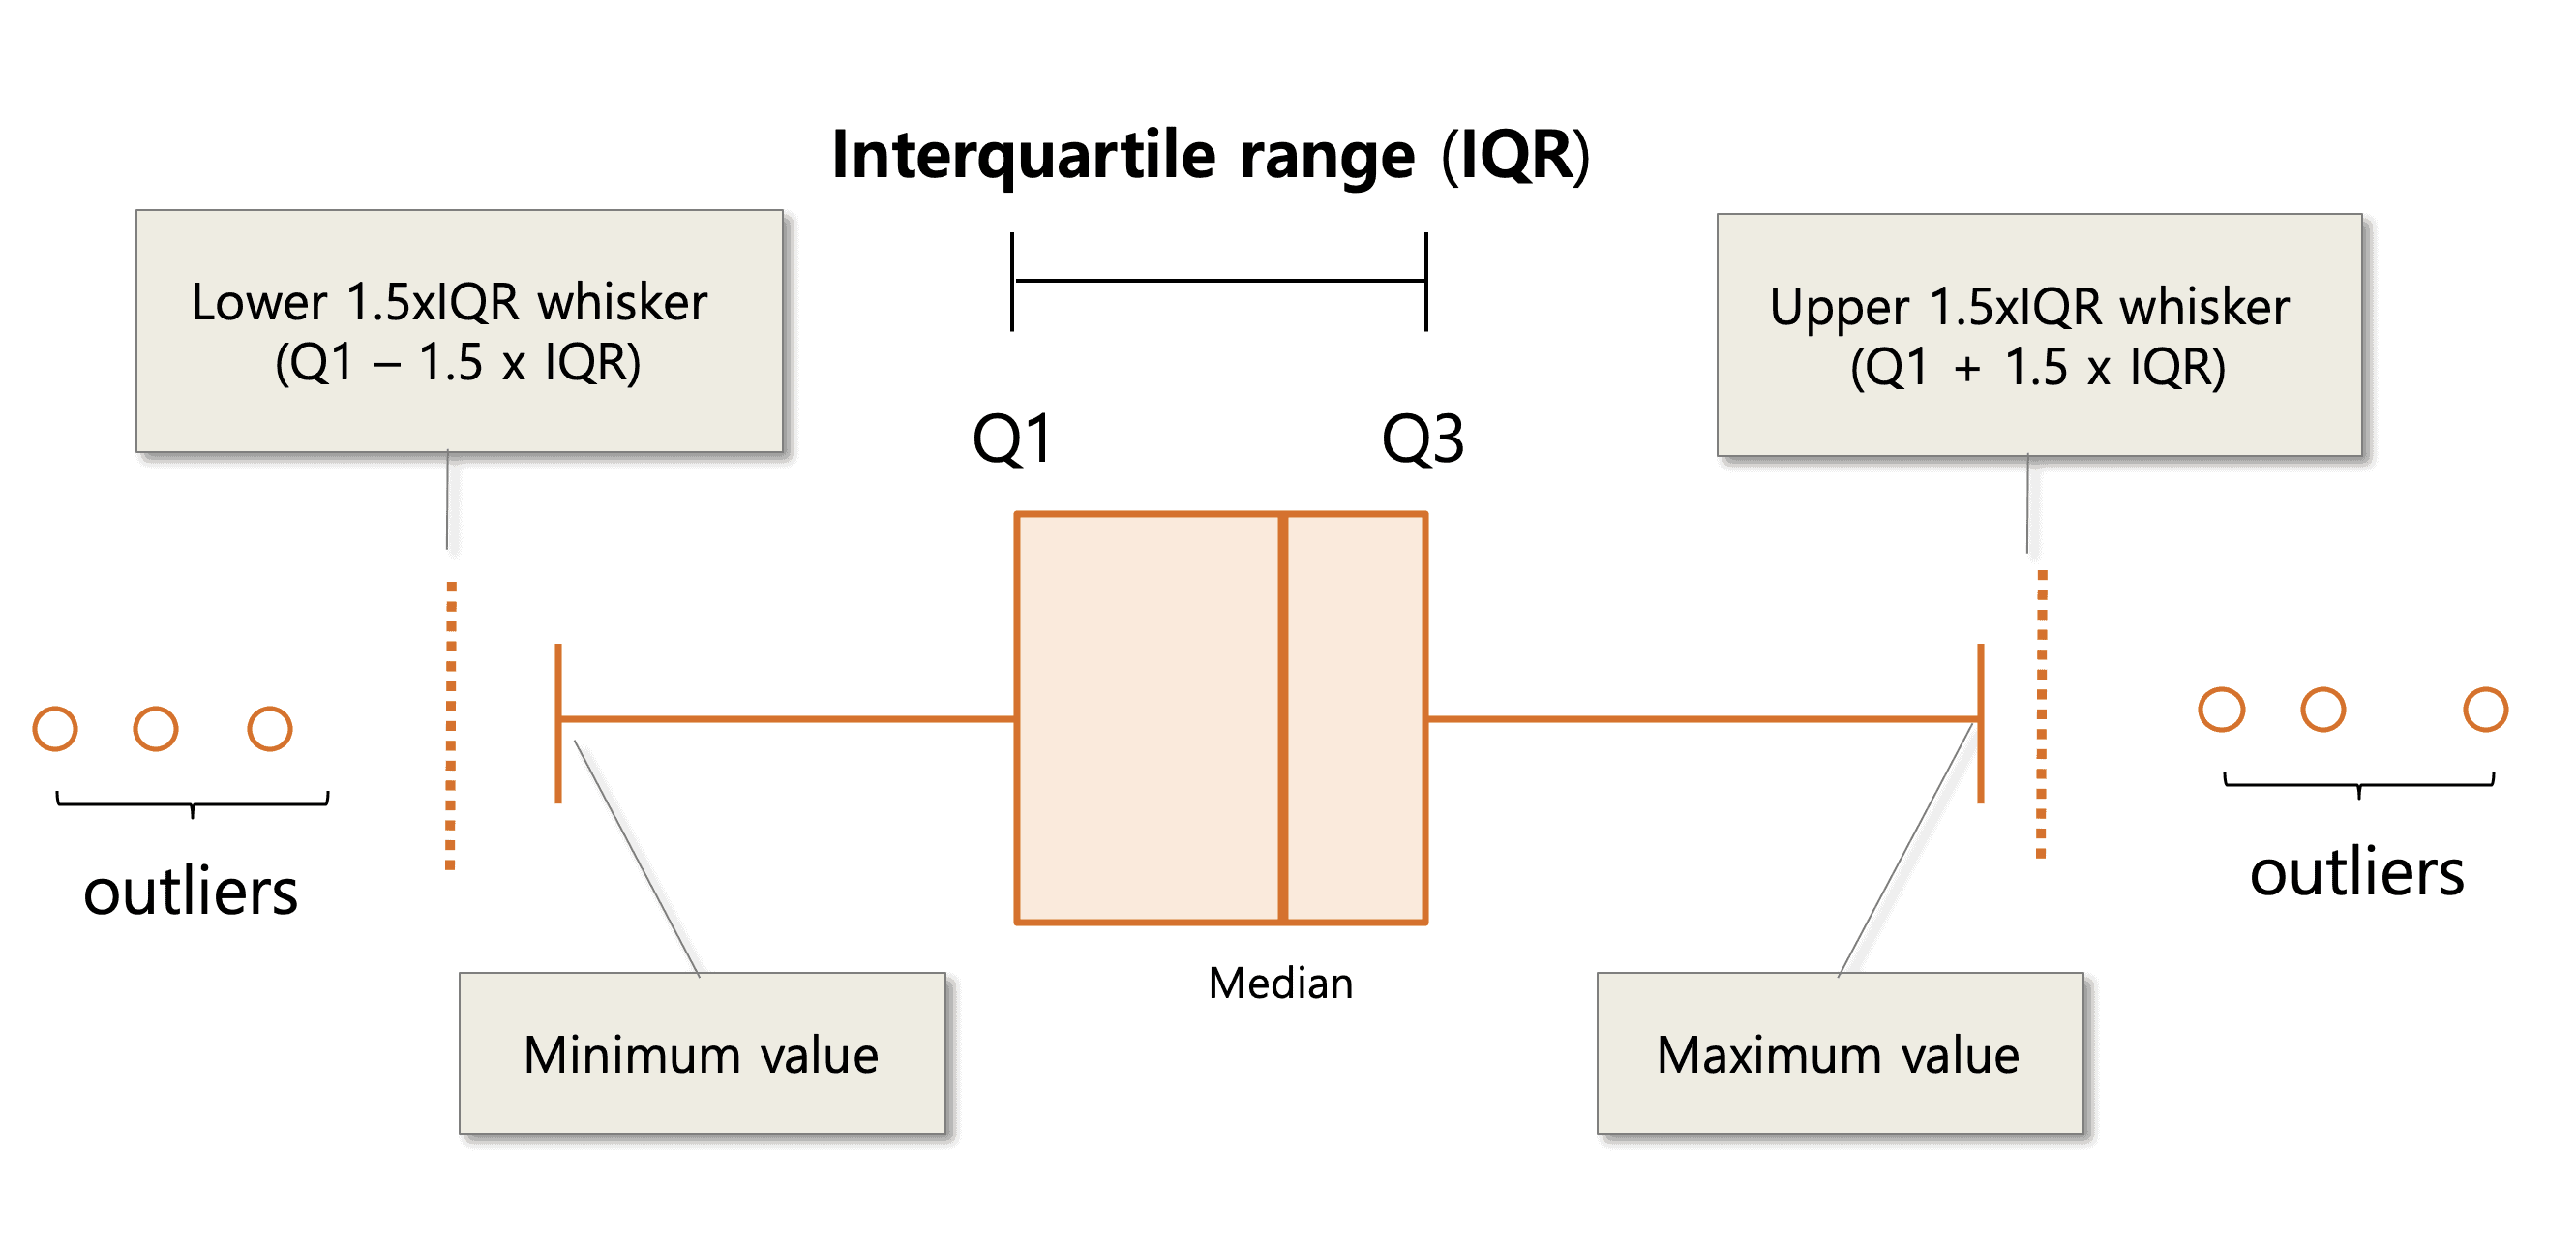

Exemplo de boxplot:
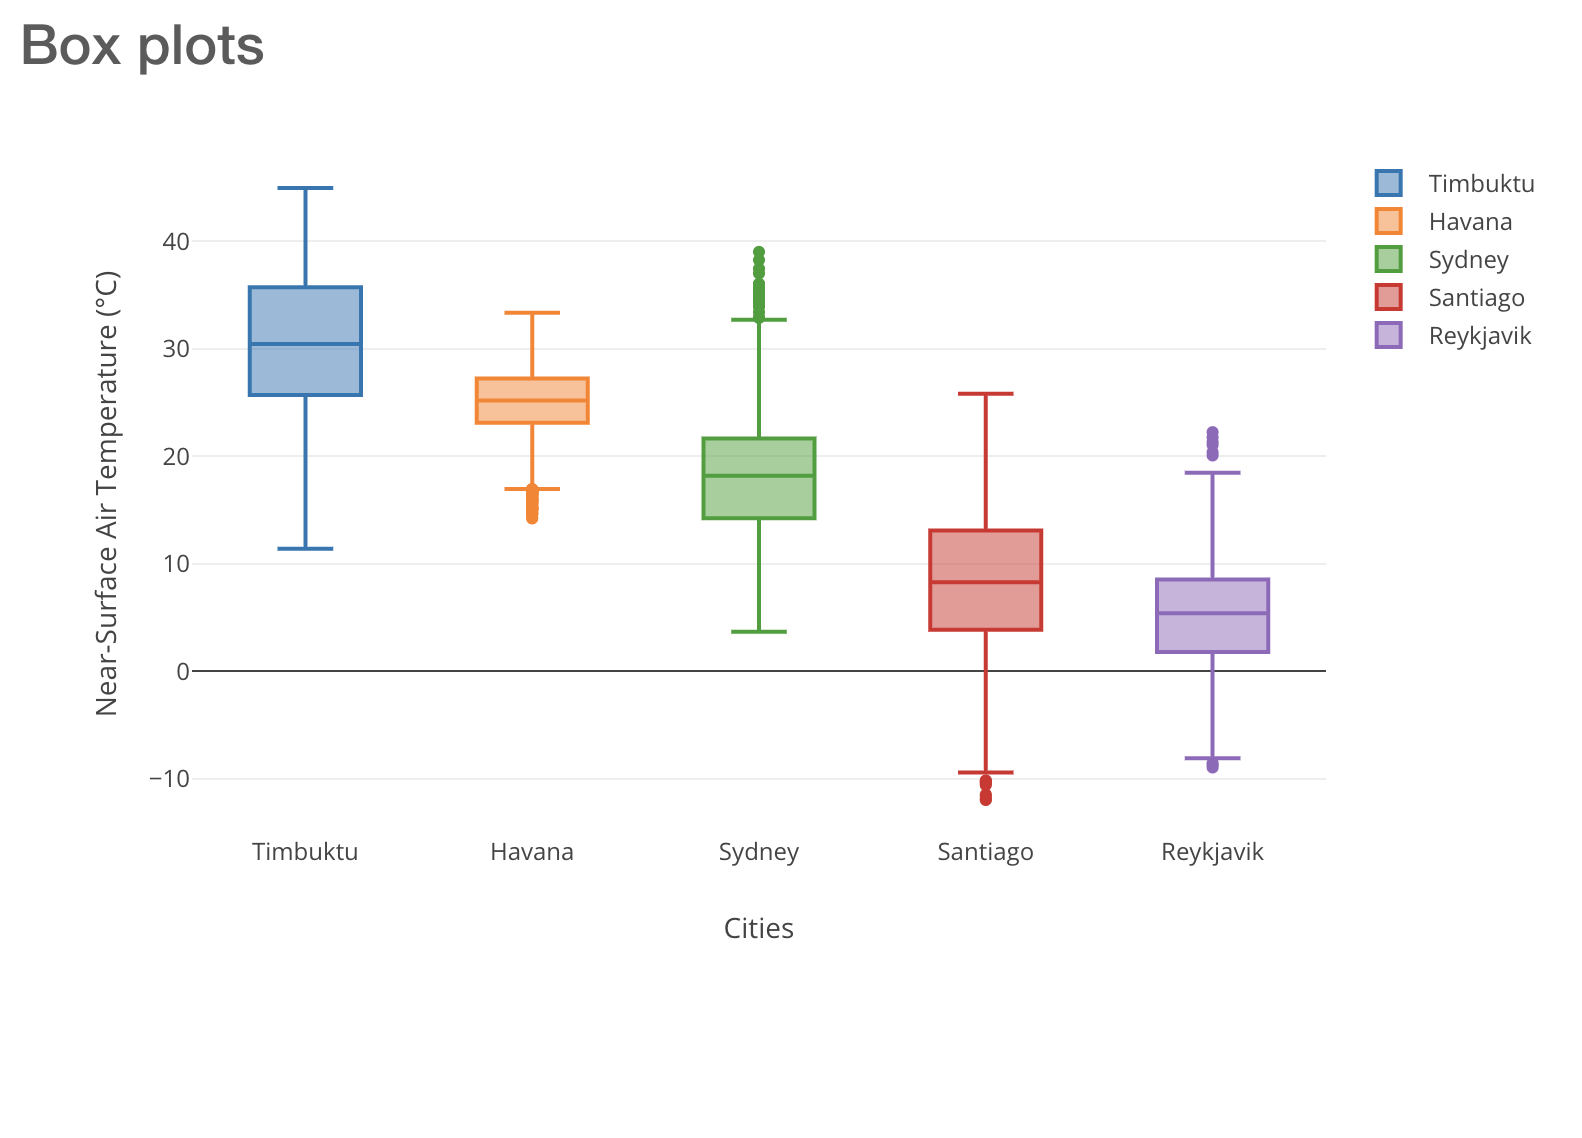

Que insights podemos extrair do boxplot acima?

**Pergunta:** o boxplot seria uma visualização apropriada para alguma das colunas do nosso dataframe?

In [82]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,date
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2020-02-28
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,2020-03-10
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0,2020-02-24
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-25
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-26


<AxesSubplot: >

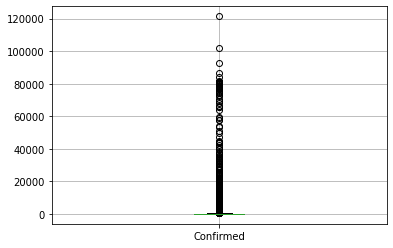

In [83]:
df.boxplot(column = 'Confirmed')

<AxesSubplot: >

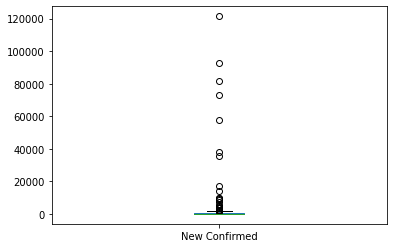

In [87]:
df.groupby("country")['New Confirmed'].sum().plot(kind = 'box')

Outro exemplo: dataset de características associadas a doenças cardíacas

In [88]:
df_heart = pd.read_csv("Datasets/heart_failure_dataset.csv")

In [89]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot: >

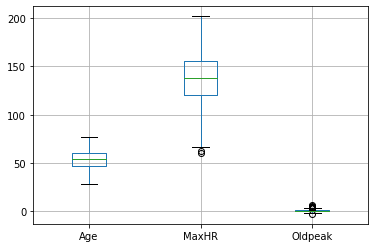

In [91]:
df_heart.boxplot(['Age', 'MaxHR', 'Oldpeak'])

Há algum problema com o plot acima?

#### Referências extras

https://www.data-to-viz.com/

https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6

Storytelling com dados: Um guia sobre visualização de dados para profissionais de negócios - by Cole Nussbaumer Knaflic

# Voltamos às 20h53

### Exercícios

Utilizando a plotagem com pandas, reproduzam as visualizações abaixo, tentando deixá-las o mais próximas quanto possível da maneira como estão postas. Para isso, atentem-se às personalizações dos gráficos, como títulos, legendas, eixos e outros tipos possíveis de formatações e preferências de visualizações dos dados. Também é interessante que vocês discutam possíveis pontos de melhorias dessas visualizações!

**Exercício 1.** Reproduza o gráfico de barras abaixo, em que cada barra representa um dos 10 países com mais casos confirmados de COVID no dataset, e a "quebra" em cada cor indica a predominância de casos confirmados em cada mês.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Datasets/Covid_19_Countrywise_timeseries.csv")

In [4]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


<AxesSubplot: ylabel='country'>

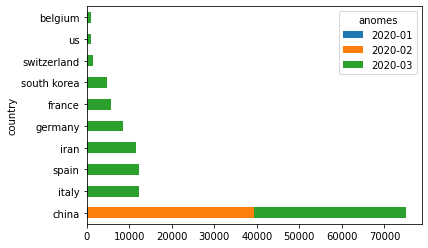

In [6]:
df['anomes'] = pd.to_datetime(df['ObservationDate']).astype('string').str.slice(0, 7, 1)
df

matriz_agregacao = pd.pivot_table(df, values='New Recovered', index='country', columns='anomes', aggfunc='sum').fillna(0)
matriz_agregacao = matriz_agregacao.sort_values('2020-03', ascending=False)[:10]
matriz_agregacao.plot(kind = 'barh', stacked=True)

In [8]:
df['reference_month'] = pd.to_datetime(df['ObservationDate']).astype('string').str.slice(0, 7, 1)
df

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,anomes,reference_month
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2020-02,2020-02
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,2020-03,2020-03
2,869,02/24/2020,afghanistan,1,0,0,AF,33.939110,67.709953,1,0,0,2020-02,2020-02
3,909,02/25/2020,afghanistan,1,0,0,AF,33.939110,67.709953,0,0,0,2020-02,2020-02
4,955,02/26/2020,afghanistan,1,0,0,AF,33.939110,67.709953,0,0,0,2020-02,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4134,03/24/2020,zimbabwe,3,1,0,ZW,-19.015438,29.154857,0,0,0,2020-03,2020-03
4969,4272,03/25/2020,zimbabwe,3,1,0,ZW,-19.015438,29.154857,0,0,0,2020-03,2020-03
4970,4482,03/26/2020,zimbabwe,3,1,0,ZW,-19.015438,29.154857,0,0,0,2020-03,2020-03
4971,4633,03/27/2020,zimbabwe,5,1,0,ZW,-19.015438,29.154857,2,0,0,2020-03,2020-03


In [17]:
matriz_agregacao = pd.pivot_table(df,
                                  values='New Confirmed',
                                  index='country',
                                  columns='reference_month',
                                  aggfunc='sum').fillna(0)
matriz_agregacao

reference_month,2020-01,2020-02,2020-03
country,,,
azerbaijan,0.0,0.0,0.0
"('st. martin',)",0.0,0.0,2.0
afghanistan,0.0,1.0,109.0
albania,0.0,0.0,197.0
algeria,0.0,1.0,453.0
...,...,...,...
venezuela,0.0,0.0,119.0
vietnam,2.0,14.0,158.0
west bank and gaza,0.0,0.0,98.0


In [22]:
type(df.groupby(["country", "reference_month"])['New Confirmed'].sum())

pandas.core.series.Series

In [23]:
df.groupby(["country", "reference_month"])['New Confirmed'].sum()

country             reference_month
 azerbaijan         2020-02              0
('st. martin',)     2020-03              2
afghanistan         2020-02              1
                    2020-03            109
albania             2020-03            197
                                      ... 
vietnam             2020-02             14
                    2020-03            158
west bank and gaza  2020-03             98
zambia              2020-03             28
zimbabwe            2020-03              7
Name: New Confirmed, Length: 305, dtype: int64

In [20]:
df.groupby(["country", "reference_month"])['New Confirmed'].sum().unstack().fillna(0)

reference_month,2020-01,2020-02,2020-03
country,,,
azerbaijan,0.0,0.0,0.0
"('st. martin',)",0.0,0.0,2.0
afghanistan,0.0,1.0,109.0
albania,0.0,0.0,197.0
algeria,0.0,1.0,453.0
...,...,...,...
venezuela,0.0,0.0,119.0
vietnam,2.0,14.0,158.0
west bank and gaza,0.0,0.0,98.0


<AxesSubplot: ylabel='country'>

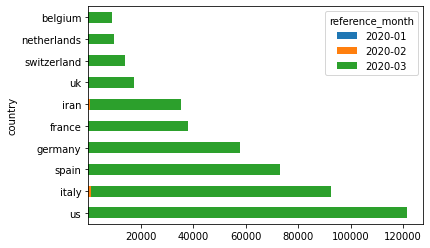

In [27]:
matriz_agregacao = matriz_agregacao.sort_values('2020-03', ascending=False)[:10]
matriz_agregacao.plot(kind = 'barh', stacked=True)

<AxesSubplot:ylabel='country'>

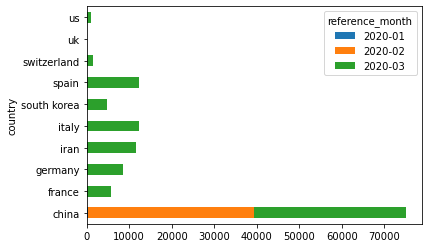

Para os exercícios abaixo, vamos trabalhar com um dataset de [emissão de CO2 por país, ao longo do tempo](https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country).

**Exercício 2.** Reproduza o gráfico de linhas abaixo, que representa a série temporal da evolução de emissões de CO2 no Brasil.

In [29]:
df = pd.read_csv("co2_emissions_kt_by_country.csv")
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [31]:
# Filtramos para o Brasil
df_brazil = df[df['country_name'] == 'Brazil']
df_brazil

,country_code,country_name,year,value
1522,BRA,Brazil,1960,46908.264000
1523,BRA,Brazil,1961,49203.806000
1524,BRA,Brazil,1962,53695.881000
1525,BRA,Brazil,1963,55617.389000
1526,BRA,Brazil,1964,56735.824000
1527,BRA,Brazil,1965,56398.460000
1528,BRA,Brazil,1966,64304.512000
1529,BRA,Brazil,1967,66193.017000
1530,BRA,Brazil,1968,77421.371000
1531,BRA,Brazil,1969,84315.331000


<AxesSubplot: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

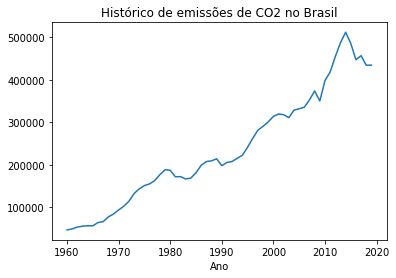

In [35]:
df_brazil.plot(kind = 'line', x = 'year', y = 'value', legend = False,
              title = 'Histórico de emissões de CO2 no Brasil',
              xlabel = 'Ano')

<AxesSubplot: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

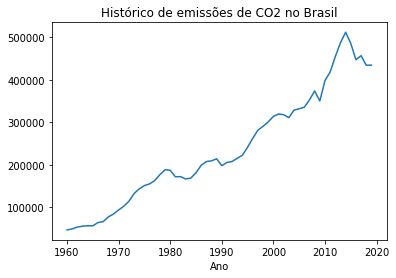

In [7]:
df

**Exercício 3**. Uma visualização muito similar à anterior, mas com a adição da média global de emissão de CO2 (o Brasil deve ser incluído na linha da média global?).

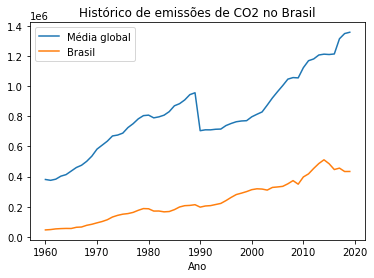

**Exercício 4.** Os 10 países que mais aumentaram, percentualmente, a emissão de CO2 entre os anos de 2018 e 2019, na forma de um gráfico de barras horizontal.

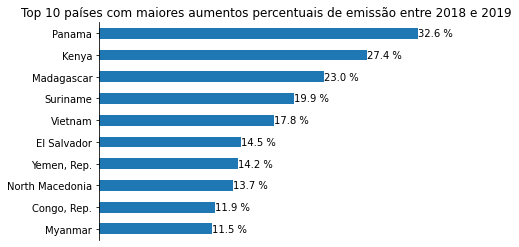